In [8]:
# Rodar somente no ambiente COLAB para obter diretório /dados ou faça o upload da pasta com os arquivos do git. 
from google.colab import drive
drive.mount('/gdrive')
!ln -s /gdrive/MyDrive/dados /content/dados

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#!pip install statsmodels==0.12.2

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [ ]:

# LÊ O ARQUIVO DO RESERVATÓRIO DE SOBRADINHO
df = pd.read_csv("dados/sobradinho.csv",  header=2, delimiter='\t', index_col=0,
                 encoding='utf-16', usecols=[0,8], names=['ds','y'],
                 parse_dates=['ds'], dayfirst=True, decimal=',')

df.index = df.index.to_period('D')

#df = df["2004-01-01":"2005-01-01"]
print(df.head())


                 y
ds                
2003-03-01  387.46
2003-03-02  387.47
2003-03-03  387.49
2003-03-04  387.51
2003-03-05  387.50


In [ ]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(df)[1])

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df.diff().diff().dropna(), lags=40, ax=ax1,title="ACF")
ax2 = fig.add_subplot(212)
fig = plot_pacf(df.diff().diff().dropna(), lags=40, ax=ax2, title="PACF")

plt.show()

'\nfrom statsmodels.tsa.stattools import adfuller\nprint("p-value:", adfuller(df)[1])\n\nfig = plt.figure(figsize=(12,8))\nax1 = fig.add_subplot(211)\nfig = plot_acf(df.diff().diff().dropna(), lags=40, ax=ax1,title="ACF")\nax2 = fig.add_subplot(212)\nfig = plot_pacf(df.diff().diff().dropna(), lags=40, ax=ax2, title="PACF")\n\nplt.show()\n'

In [ ]:

arima = ARIMA(df, order=(8,0,1), seasonal_order=(0,0,1,12))

model_fit = arima.fit()

print(model_fit.summary())

prediction = model_fit.get_prediction(start='2021-03-01',end='2022-03-01')

predicted_values = prediction.predicted_mean
confidence_intervals = prediction.conf_int(alpha=0.05)

C:\Users\Clovis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Clovis\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 6575
Model:             ARIMA(8, 0, 1)x(0, 0, 1, 12)   Log Likelihood               13389.327
Date:                          Tue, 27 Jul 2021   AIC                         -26754.654
Time:                                  23:31:20   BIC                         -26673.162
Sample:                              03-01-2003   HQIC                        -26726.485
                                   - 02-28-2021                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        387.6634      0.603    642.925      0.000     386.482     388.845
ar.L1          0.7511      0.151      4.965      0.

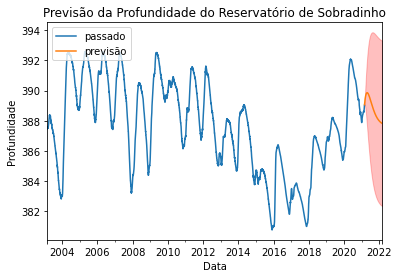

In [ ]:
df.plot()
predicted_values.plot()
plt.xlabel("Data")
plt.ylabel("Profundidade")
plt.title("Previsão da Profundidade do Reservatório de Sobradinho")
plt.legend(("passado", "previsão"), loc="upper left")
plt.fill_between(confidence_intervals.index.values,
                 confidence_intervals["lower y"][0:].values,
                 confidence_intervals["upper y"][0:].values, color="red", alpha=0.25)
plt.show()